---
title: "Tensorflow 2.0 Tutorial ch8.3.1 - 컨볼루션 신경망을 사용한 텍스처 합성"
date: 2020-05-01T17:20:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "Binary Classification"
  - "Classification"
  - "신경 스타일 전이"
  - "Transfer Learning"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch8.3.1 - 컨볼루션 신경망을 사용한 텍스처 합성
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶으신 분은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)
- [Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트](https://chloevan.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)
- [Tensorflow 2.0 Tutorial ch5.1 - 분류](https://chloevan.github.io/python/tensorflow2.0/ch5_1_binary_classification/)
- [Tensorflow 2.0 Tutorial ch5.2 - 다항분류](https://chloevan.github.io/python/tensorflow2.0/ch5_2_multi_classification/)
- [Tensorflow 2.0 Tutorial ch5.3 - Fashion MNIST](https://chloevan.github.io/python/tensorflow2.0/ch5_3_fashion_mnist/)
- [Tensorflow 2.0 Tutorial ch6.1-2 - CNN 이론](https://chloevan.github.io/python/tensorflow2.0/ch6_1_2_cnn_theory/)
- [Tensorflow 2.0 Tutorial ch6.3 - Fashion MNIST with CNN 실습](https://chloevan.github.io/python/tensorflow2.0/ch6_3_fashion_mnist_with_cnn/)
- [Tensorflow 2.0 Tutorial ch6.4 - 모형의 성능 높이기](https://chloevan.github.io/python/tensorflow2.0/ch6_4_improve_performance/)
- [Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (1)](https://chloevan.github.io/python/tensorflow2.0/ch7_1_2_rnn_theory1/)
- [Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (2)](https://chloevan.github.io/python/tensorflow2.0/ch7_1_2_rnn_theory2/)
- [Tensorflow 2.0 Tutorial ch7.3 - 긍정, 부정 감성 분석](https://chloevan.github.io/python/tensorflow2.0/ch7_3_sentimentanalysis/)
- [Tensorflow 2.0 Tutorial ch7.4 - (1) 단어 단위 생성](https://chloevan.github.io/python/tensorflow2.0/ch7_4_naturallanguagegeneration1/)
- [Tensorflow 2.0 Tutorial ch7.4 - (2) 단어 단위 생성](https://chloevan.github.io/python/tensorflow2.0/ch7_4_naturallanguagegeneration2/)
- [Tensorflow 2.0 Tutorial ch8.1 - 텐서플로 허브](https://chloevan.github.io/python/tensorflow2.0/ch8_1_tensorflow_hub/)
- [Tensorflow 2.0 Tutorial ch8.2 - 전이 학습과 & Kaggle 대회](https://chloevan.github.io/python/tensorflow2.0/ch8_2_transfer_learning/)

## I. 개요

2015년, 딥러닝과 예술의 만남으로 큰 화제가 되었던 신경 스타일 전이 논문[^1]은 반 고흐의 (별이 빛나는 밤에)라는 그림과 풍경 사진을 합성해서 반 고흐가 그린 것 같은 스타일의 풍경 이미지를 만들었고, [프리즈마](https://prisma-ai.com/)등의 앱은 이 알고리즘을 빠르게 탑재해서 인기를 끌었습니다. 

본 포스트에서는 텍스처 합성에 대해 알아본 뒤 2장의 이미지에서 각각 스타일과 내용을 가져와서 합성하는 신경 스타일 전이에 대해 다루도록 합니다. 






## II. 컨볼루션 신경망을 사용한 텍스처 합성
텍스처(Texture)는 넓은 의미로는 단순히 이미지만, 컴퓨터 비전에서 쓰이는 좁은 의미로는 지역적으로는 비교적 다양한 값을 가지면서 전체적으로는 비슷한 모습을 보이는 이미지를 뜻합니다.[^2]

돌, 나무, 구름, 섬유 등의 텍스처에서는 위 조건에 해당하는 일정한 패턴을 관찰할 수 있으며, 이 패턴은 전체적으로 비슷하면서도 지역적으로는 서로 조금씩 다릅니다. 



### (1) 텍스처 합성 방법론
텍스처 합성 방법론은 크게 두가지입니다. 
- 첫번째, 픽셀이나 이미지를 잘게 쪼갠 단위인 `Patch`(조각)을 재배열하는 방법입니다. Patch Match 알고리즘을 최적화한 버전입니다. 
- 두번째, 파라미터에 의한 텍스처 모델링입니다. 먼저 원본 텍스처의 공간적인 통계값(Spatial Statistics)을 사람이 정교하게 만든 여러 개의 필터로 구합니다. 

특히, 교재는 필터 부분을 딥러닝이 가장 제일 잘하는 것으로 설명하고 있고, 여기에 관한 그림 및 이론적인 설명으로 297-300페이제 걸쳐서 설명을 하고 있습니다. 

- 주요 논문은 [Texture Synthesis Using Convolutional Neural Networks](https://papers.nips.cc/paper/5633-texture-synthesis-using-convolutional-neural-networks.pdf) 입니다. 
- Gram Matrix을 활용합니다.[^3]

이 부분은 교재를 참고하시기를 바랍니다. 

### (2) 원본 텍스처 이미지 불러오기

이제 실습 코드로 진행해봅니다. 

344064/337723 [==============================] - 0s 0us/step


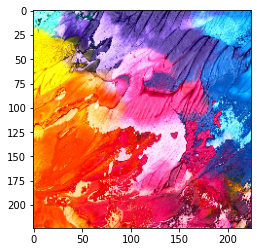

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import cv2

style_path = tf.keras.utils.get_file('style.jpg', 'http://bit.ly/2mGfZIq')
style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224, 224))
style_image = style_image / 255.0
plt.imshow(style_image)

`tf.keras.utils.get_file()` 함수로 파일을 다운로드한 뒤에 `OpenCV`로 이미지의 크기를 (224, 224)로 조정합니다. 더 큰 크기로 지정해도 상관없지만 일단은 작은 크기에서 어떻게 동작하는지 확인해보고, 큰 크기의 이미지는 다음 절의 신경 스타일 전이에서 시도합니다.




### (3) 타깃 텍스처 만들기
그 다음으로는 타깃 텍스처로 사용할 이미지를 만듭니다. 타깃 텍스처는 랜덤 노이즈 이미지에서 시작하며, 랜덤 노이지를 만드는 방법 `3.3.1`절의 난수생성에서 배운 걸 응용합니다. 

tf.Tensor([0.41158473 0.38533032 0.04913914], shape=(3,), dtype=float32)


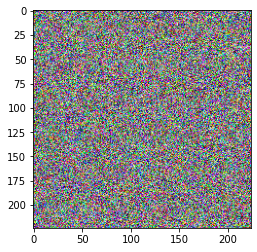

In [2]:
target_image = tf.random.uniform(style_image.shape)
print(target_image[0,0,:])

plt.imshow(target_image)

`style_image`와 같은 차원을 가지는 랜덤 노이즈를 생성합니다. 컬러 이미지이기 때문에 차원 수는 (224, 224, 3)으로 마지막에 `RGB` 차원을 나타내는 3이 붙습니다. 타깃 텍스처의 첫 번째 픽셀(좌측 최상단)의 값을 출력해보면 0~1 사이의 `RGB`컬러 값을 확인할 수 있습니다. 

In [3]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

vgg = VGG19(include_top=False, weights='imagenet')

for layer in vgg.layers:
  print(layer.name)

80142336/80134624 [==============================] - 1s 0us/step
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


전체 네트워크를 불러올 필요가 없이 때문에 `include_top`인수를 `False`로 지정해서 마지막의 `Dense`레이어를 제외한 나머지 레이어를 불러와 `vgg` 변수에 저장합니다. `vgg` 변수에 저장된 네트워크에는 특징 추출기의 역할을 하는 컨볼루션 레이어와 풀링 레이어를 포함하고 있습니다. 이 중에서 선택적으로 사용할수도 있지만, `Gram Matrix`가 지역적인 구조와 전체적인 구조를 모두 잡아낼 수 있도록 앞쪽과 뒤쪽의 레이어를 모두 사용하는 것이 좋습니다. 

### (4) 특징 추출 모델 만들기
위 내용을 기반으로 특징 추출 모델을 만들어보도록 합니다. 

In [0]:
style_layers = ['block1_conv1', 
                'block2_conv1', 
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

vgg.trainable = False
outputs = [vgg.get_layer(name).output for name in style_layers]
model = tf.keras.Model([vgg.input], outputs)

- 위 코드는 이미지를 입력하면 다섯 개의 레이어에서 출력되는 특징 추출값을 얻을 수 있는 모델입니다. 
- 이 모델은 `model`이라는 변수에 저장합니다. 

### (5) Gram Matrix 함수 정의

`Gram Matrix`를 계산하는 함수를 정의합니다. 


In [0]:
def gram_matrix(input_tensor):
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

- 먼저 입력된 특징 추출값의 형태를 벡터로 변환시킵니다. 예를 들어, 첫 번째 레이어인 `block1_conv1`를 통과한 특정 추출값의 차원 수는 (224, 224, 64)입니다. 
- 이것을 맨 뒤의 차원(채널)인 64만 남기고 나머지를 1차원의 벡터로 만들면 차원 수는 (50176, 64)가 됩니다. 
- 이렇게 만든 행렬은 자기 자신의 전치행렬과 행렬곱하는 부분은 `gram = tf.matmul(a, a, transpose_a = True)`입니다. `transpose_a`라는 인수에 `True`값을 넣어서 행렬곱을 할 때 전치행렬을 자동으로 만들어서 계산해도 됩니다. 
- `transpose_a`가 `True`이기 때문에 행렬곱 계산 결과의 차원은 `[64,50176]X[50176,64] = [64,64]`가 됩니다. 
- `(224, 224, 64)`가 `[64, 64]`로 줄어듭니다. 
- 마지막 `return`문에서는 1차원 벡터의 길이인 `50,176`으로 `Gram Matrix`값을 나눕니다. 
- 이렇게 나누지 않으면 앞쪽에 오는 레이어일수록 특징 추출값의 이미지가 크기 때문에 `Gram Matrix`값도 커져서 큰 영향을 줍니다. 


### (6) 원본 텍스처에서 Gram Matrix 계산

원본 텍스처에서 `Gram Matrix` 계산합니다. 

In [0]:
style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224, 224))
style_image = style_image / 255.0

style_batch = style_image.astype('float32')
style_batch = tf.expand_dims(style_batch, axis=0)
style_output = model(preprocess_input(style_batch * 255.0))

`style_output`은 다섯 레이어를 통과한 특징 추출값으로 구성되어 있습니다. 그중 하나를 `matplotlib.pyplot`으로 출력합니다. 

(1, 224, 224, 64)


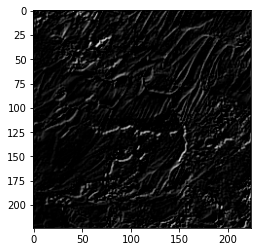

In [7]:
print(style_output[0].shape)
plt.imshow(tf.squeeze(style_output[0][:,:,:,0], 0), cmap='gray')

특징 추출값 [1, 224, 224, 64]을 확인할 수 있습니다. 이렇게 처리된 원본 텍스처의 `Gram Matrix`값을 계산합니다. 또 값이 어떻게 나오는지 그래프로 분포를 확인해봅니다. 

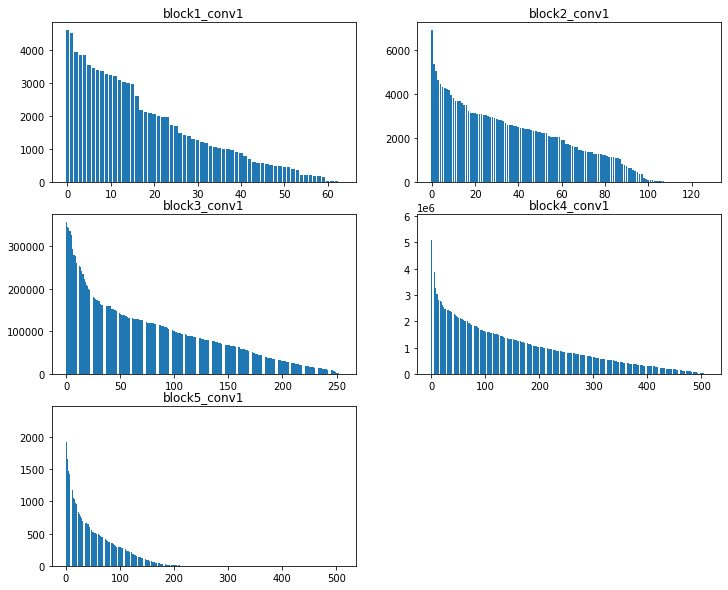

In [8]:
style_outputs = [gram_matrix(out) for out in style_output]

plt.figure(figsize=(12,10))
for c in range(5):
    plt.subplot(3,2,c+1)
    array = sorted(style_outputs[c].numpy()[0].tolist())
    array = array[::-1]
    plt.bar(range(style_outputs[c].shape[0]), array)
    plt.title(style_layers[c])
plt.show()

`Gram Matrix` 값은 레이어마다 다르게 나오고 최대값에서도 차이가 나는 것을 확인할 수 있습니다. 즉, 이 말은 각 레이어에서 계산되는 `Gram Matrix`값에 가중치를 곱해주는 방법으로 특정한 레이어가 너무 큰 영향을 끼치지 못하도록 제어를 해야 합니다. 

따라서, 타깃 텍스처를 업데이트 하기 위해 몇 가지 함수를 설정해야 합니다. 

### (7) 타깃 텍스처 업데이트 함수 정의
- 먼저, 타깃 텍스처에서 `gram matrix`을 구하는 함수가 필요합니다. 
- MSE를 구하는 함수가 필요한데, 원본 텍스처의 Gram Matrix 값과, 타깃 텍스처의 Gram Matrix 사이의 `MSE` 함수가 필요합니다. 
- 이 때, MSE 값이 0.0에서 1.0사이의 컬러 값이어야 하기 때문에 그 이하나 이상으로 값이 넘어가지 않도록 해주는 함수가 필요합니다. 



In [0]:
# 타깃 텍스처 gram matrix 함수 정의
def get_outputs(image):
    image_batch = tf.expand_dims(image, axis=0)
    output = model(preprocess_input(image_batch * 255.0))
    outputs = [gram_matrix(out) for out in output]
    return outputs

# MSE 구하는 함수 (원본 텍스처 gram matrix - 타깃 텍스처 gram matrix)
def get_loss(outputs, style_outputs):
    return tf.reduce_sum([tf.reduce_mean((o-s)**2) for o,s in zip(outputs, style_outputs)])
  
# 0.0~1.0 사이의 컬러값 정의 함수
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

### (8) 이미지 업데이트 함수 정의
- 지금까지 배워온 딥러닝과의 차이점
  + tf.keras를 이용해 모델 정의하고 `fit()` 함수를 이용해 가중치가 주어진 과제를 잘 수행하도록 하는 것
  + 그런데, 이번 포스트에서는 학습해야 할 가중치가 존재하지 않음
  + 존재하는 것은 2개의 이미지와 `Gram Matrix`의 차이인 MSE 뿐

- `GradientType`은 이런 상황에 대한 간편한 해결책임. 자동 미분을 통해 입력에 대한 손실을 구한 뒤 다른 변수에 대한 `Gradient(기울기)`를 계산함. 여기에서 다른 변수는 입력이 될 수도 있고, 가중치가 될 수도 있음. 
- 중요한 점은 `GradientType`의 계산 과정 안에 묶인 변수에 대한 `Gradient`여야 함. 


In [0]:
opt = tf.optimizers.Adam(learning_rate=0.2, beta_1=0.99, epsilon=1e-1)

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = get_outputs(image)
        loss = get_loss(outputs, style_outputs)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

첫 줄에서 최적화 함수(`optimizer`)를 정의함. 논문에서는 `L-BFGS`라는 최적화 함수를 썼지만, `Adam Optimizer`를 사용해도 속도는 더 빠르고 결과물은 비슷하게 나옵니다.[^4]

`tf.function()` 함수는 `train_step(image)` 함수를 인수로 받아서 `Autograph`라는 강력한 기능을 추가합니다. `Autograph`는 파이썬 문법으로 텐서플로의 핵심인 그래프(`Graph`)를 컨트롤 할 수 있게 해줍니다. 

`2.0` 버전을 위해 즉시 실행 모드(`Eager Execution`)와 `tf.function` 장식자가 나오면서 이런 불편함이 개선됩니다. `tf.function`은 해당 장식자를 사용한 함수에서 호출되는 다른 함수도 그래프에 자동으로 포함시킵니다. 그리고 `GradientTape`은 계산에 관계되는 모든 변수와 연산을 추적하기 때문에 퍼포먼스에 영향을 주는데 `tf.function`장식자를 붙이면 이 연산들을 고성능의 그래프 연산으로 변환하기 때문에 퍼포먼스를 개선할 수 있습니다. 

```python
with tf.GradientTape() as tape:
  outputs = get_outputs(image)
  loss = get_loss(outputs, style_outputs)
```

`GradientTape()`는 보통 `with`와 함께 사용합니다. `tape`라는 이름으로 새로운 `GradientTape`의 인스턴스를 생성해서 참조합니다. 앞에서 설명한대로 `get_outputs(image)`, `get_loss(outputs, style_outputs)` 함수는 `tf.function` 장식자를 쓰지 않았지만, 호출한 함수에 장식자가 붙었기 때문에 텐서플로의 그래프에 자동으로 포함됩니다. 

```python
grad = tape.gradient(loss, image)
opt.apply_gradients([(grad, image)])
image.assign(clip_0_1(image))
```

- `tape.gradient(loss, image)`는 `with` 구문 안에서 발생한 계산을 추적해서 입력값인 `image`에 대한 `loss`의 `gradient`를 계산합니다. 
- 이렇게 계산된 `gradient`는 변수 `grad`에 저장되고 `Adam Optimizer`를 통해 `image`에 영향을 줍니다. 즉, 입력값인 `image`는 이 계산으로 변화가 됩니다.
- `clip_0_1(image)`함수의 계산 결과를 `image`에 다시 넣어서 컬러값이 `0.0`과 `1.0` 사이에 머물게 합니다. 




### (9) 텍스처 합성 알고리즘 실행
- 이제 앞에서 정의한 `train_step(image)` 함수를 반복적으로 실행해서 텍스처를 합성합니다. 

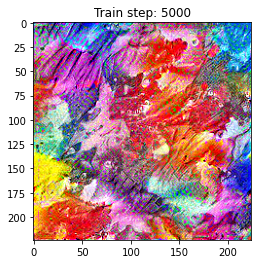

Total time: 134.1


In [11]:
import IPython.display as display
import time
import imageio

start = time.time()

image = tf.Variable(target_image)

epochs = 50
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
    if n % 5 == 0 or n == epochs - 1:
        imageio.imwrite('style_epoch_{0}.png'.format(n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

- 먼저 첫 줄에서는 새로운 텍스처 출력을 나타내고 이전 이전 텍스처 출력을 지우기 위해 `IPython.display`에서 `display`를 임포트합니다. 

- 실행 시간을 추적하기 위해 `time`을, 합성된 텍스처 이미지를 저장하기 위해 `imageio`를 import 합니다. 

```python
image = tf.Variable(target_image)
```

- 타깃 텍스처에 `tf.Variable`을 씌워서 `image`라는 변수로 저장합니다. 텐서플로에서 그래프 연산을 하는 `tensor`는 `tf.Variable`이나 `tf.Constant` 등에 저장되어야 합니다. (`tf.keras`)에서는 넘파이 `array`를 넘겨도 자동으로 이런 변환을 해줬지만 여기서는 직접 해야 합니다. 

- 중첩 for 문에서는 에포크당 100 step씩 train_step(image)함수를 실행시킵니다. 



### (10) variation loss 함수 정의

- 매끄러운 원본과 달리 자글자글한 노이즈가 보입니다. 이러한 이미지에 생기는 노이즈를 개선하기 위해서 전체 손실에 `variation loss`라는 것을 추가해볼 수 있습니다. `variation loss`란 어떤 픽셀과 바로 옆에 인접한 픽셀의 차이입니다. 이 차이가 작을수록 이미지는 매끄럽게 보입니다. 



In [0]:
def high_pass_x_y(image):
  x_var = image[:, 1:, :] - image[:, :-1, :]
  y_var = image[1:, :, :] - image[:-1, :, :]
  return x_var, y_var

def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_mean(x_deltas**2) + tf.reduce_mean(y_deltas**2)

- `high_pass_x_y(image)` 함수에서는 입력된 `image`의 `x축 방향`과 `y축 방향`의 차이를 구합니다. 
- `x_var`는 `image(224, 224, 3)`의 `Shape`일 때 `(224, 223, 3)`이 되고, `y_var`는 `(223, 224, 3)`으로 각각 x와 y의 방향으로 1픽셀씩 작은 image가 됩니다. 
- total_variation_loss(image) 함수에서는 이렇게 구한 x, y축 방향의 차이를 제곱해서 평균을 낸 다음에 합해서 반환합니다. 

왜 `variation loss`가 필요한지 원본 텍스처와 타깃 텍스처, 그리고 랜덤 노이즈 텍스처의 `variation loss`를 비교합니다. 


In [13]:
print('target :', total_variation_loss(image.read_value()))
print('noise : ', total_variation_loss(tf.random.uniform(style_image.shape)))
print('original : ', total_variation_loss(style_image))

target : tf.Tensor(0.103747204, shape=(), dtype=float32)
noise :  tf.Tensor(0.33323908, shape=(), dtype=float32)
original :  tf.Tensor(0.03641251305469578, shape=(), dtype=float64)


- 위 결과값은 타깃 텍스처의 `variation loss`는 랜덤 노이즈의 1/3 정도로 작지만, 원본 텍스처보다는 3배 정도 큽니다. 

### (11) 각 손실의 가중치 추가
이 차이가 줄어들게 된다면 타깃 텍스처는 원본 텍스처에 더 가까운 모습을 보일 것이라고 가정하고, `variation loss`를 전체 손실 계산식에 추가합니다. 

In [0]:
total_variation_weight = 1e9
style_weight = 1e-1

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = get_outputs(image)
        loss = style_weight * get_loss(outputs, style_outputs)
        loss += total_variation_weight * total_variation_loss(image)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

- 지금까지 구한 `Gram Matrix`는 `style loss`라고 부릅니다. 이 `style loss`와 새로 추가된 `variation loss`에 각각 가중치를 곱해서 전체 손실에 더합니다. 
- `variation loss`는 `Gram Matrix` 계산값에 비해 작기 때문에 큰 가중치를 곱하고, 반대로 `style loss`는 값을 줄여줍니다. 여기에 들어가는 가중치인 `total_variation_weight`와 `style_weight`는 적절한 값을 찾을 때까지 꾸준한 실험이 필요합니다. 

### (12) variation loss를 추가한 텍스처 합성 알고리즘 실행
개선된 결과를 얻을 수 있는지, 결과값의 `variation loss`를 출력하면 다음과 같습니다. 

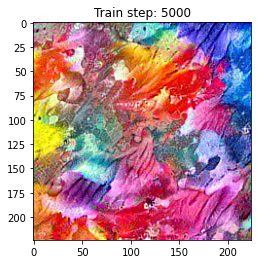

Total time: 134.2


In [15]:
start = time.time()

target_image = tf.random.uniform(style_image.shape)
image = tf.Variable(target_image)

epochs = 50
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
    if n % 5 == 0 or n == epochs - 1:
        imageio.imwrite('style_epoch_{0}.png'.format(n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

확실히 좀 더 개선된 결과를 얻을 수 있습니다. 이렇게 결과값의 `variation loss`를 출력해보면 다음과 같습니다. 

In [16]:
print('target :', total_variation_loss(image.read_value()))
print('original : ', total_variation_loss(style_image))

target : tf.Tensor(0.031433545, shape=(), dtype=float32)
original :  tf.Tensor(0.03641251305469578, shape=(), dtype=float64)


타깃 텍스처의 `variation loss`가 원본 텍스처보다도 더 작아진 것을 확인할 수 있습니다. 결과 이미지도 `style loss`만 사용했을 때 보다 매끄럽게 변한 것 같습니다. 

### (13) 결론
지금까지 배운 것은 `style loss`와 `variation loss`를 이용하여 텍스쳐 합성 방법을 알아보도록 합니다. 



## III. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch8_3_1_Texture_Synthesis.ipynb) 

[^1]: Leon A. Gatys, Alexander S. Ecker, Matthias Bethge., (2015). A Neural Algorithm of Artistic Style. https://arxiv.org/abs/1508.06576

[^2]: https://www.textures.com/ 에서 텍스처 이미지를 다양하게 확인할 수 있습니다. 

[^3]: Gram Matrix는 앞에서 본 각 뉴런의 특징 추출값을 1차원의 벡터로 변환한 다음에, 벡터를 쌓아올린 행렬을 그 자신의 전치(`transpose`) 행렬과 행렬곱해서 얻는 값입니다. 

[^4]: Ivanov, S. (2017). "Picking an optimizer for Style Transfer". Retrieved from https://blog.slavv.com/picking-an-optimizer-for-style-transfer-86e7b8cba84b 

## VI. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.